In [1]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales de países desde naturalearth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv("./datosLimpios2022.csv")

C:\Users\darin\AppData\Local\Temp\ipykernel_24484\2357025378.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [3]:
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90


In [4]:
country_mapping = {
    'ARGENTINA': 'Argentina',
    'SUIZA SWITZERLAND': 'Switzerland',
    'COLOMBIA': 'Colombia',
    'ESTADOS UNIDOS USA': 'United States',
    'ESPAÑA': 'Spain',
    'REPUBLICA DOMINICANA DOMINICAN RP': 'Dominican Republic',
    'REPUBLICA DE MOLDOVA REP MOLDOVA': 'Moldova',
    'PERU PERU': 'Peru',
    'MEXICO MEXICO': 'Mexico',
    'BRASIL BRAZIL': 'Brazil',
    'PANAMA PANAMA': 'Panama',
    'CANADA': 'Canada',
    'INDIA INDIA': 'India',
    'BOLIVIA BOLIVIA': 'Bolivia',
    'NICARAGUA NICARAGUA': 'Nicaragua',
    'FRANCIA': 'France',
    'CHILE': 'Chile',
    'TAILANDIA THAILAND': 'Thailand',
    'ARUBA': 'Aruba',
    'PUERTO RICO PUERTO RICO': 'Puerto Rico',
    'ALEMANIA (UNIDAD ALEMANA) GERMANY': 'Germany',
    'ITALIA ITALY': 'Italy',
    'COSTA RICA': 'Costa Rica',
    'GUATEMALA GUATEMALA': 'Guatemala',
    'QATAR QATAR': 'Qatar',
    'CUBA': 'Cuba',
    'EL SALVADOR': 'El Salvador',
    'TURQUIA TURKEY': 'Turkey',
    'PAISES BAJOS ( ISLA CURAZAO; HOLANDA; ZELANDA) NETHERLANDS': 'Netherlands',
    'EMIRATOS ARABES UNIDOS UNTD ARAB EM': 'United Arab Emirates',
    'PARAGUAY PARAGUAY': 'Paraguay',
    'SUDAN SUDAN': 'Sudan',
    'BELGICA BELGIUM': 'Belgium',
    'PORTUGAL PORTUGAL': 'Portugal',
    'BAHAMAS BAHAMAS': 'Bahamas',
    'VENEZUELA VENEZUELA': 'Venezuela',
    'URUGUAY URUGUAY': 'Uruguay',
    'HONDURAS HONDURAS': 'Honduras',
    'EGIPTO': 'Egypt',
    'REINO UNIDO (de GRAN BRETAÑA: ESCOCIA; GALES, INGLATERRA E IRLANDA DEL NORTE) UK': 'United Kingdom',
    'LIBANO LEBANON': 'Lebanon',
    'ISRAEL ISRAEL': 'Israel',
    'REPUBLICA DE COREA (COREA DEL SUR) KOREA REP.': 'South Korea',
    'SUECIA SWEDEN': 'Sweden',
    'SUDAFRICA SOUTH AFRICA': 'South Africa',
    'REPUBLICA CHECA CZECH REP': 'Czech Republic',
    'AUSTRALIA AUSTRALIA': 'Australia',
    'INDONESIA INDONESIA': 'Indonesia',
    'ANGOLA': 'Angola',
    'BENIN BENIN': 'Benin',
    'FINLANDIA': 'Finland',
    "COTE D' IVOIRE (COSTA DE MARFIL) COTE DIVOIRE": 'Côte d\'Ivoire',
    'FEDERACION DE RUSIA (ANTIGUA UNION SOVIETICA) RUSSIAN FED': 'Russia',
    'UCRANIA UKRAINE': 'Ukraine',
    'HAITÍ HAITÍ': 'Haiti',
    'NUEVA ZELANDIA NEW ZEALAND': 'New Zealand',
    'ARABIA SAUDITA SAUDI ARABIA': 'Saudi Arabia',
    'SAMOA AMERICANA AMER SAMOA': 'American Samoa',
    'HUNGRIA HUNGARY': 'Hungary',
    'SINGAPUR SINGAPORE': 'Singapore',
    'IRLANDA IRELAND': 'Ireland',
    'LUXEMBURGO LUXEMBOURG': 'Luxembourg',
    'GUINEA ECUATORIAL EQ.GUINEA': 'Equatorial Guinea'
}



In [5]:
paises_datos=df["pais_prod"]
paises_cambiados= paises_datos.replace(country_mapping)

In [6]:
pais_transformado = pd.DataFrame(paises_cambiados)

In [7]:
def cambio_nombre(lista_paises_nuestro, df_naturalearth, columna_naturalearth='name'):
    lista_paises = []
    
    for pais in lista_paises_nuestro:
        # Buscar coincidencia de pais en el DataFrame de Natural Earth
        mask = df_naturalearth[columna_naturalearth].str.contains(pais, case=False)
        
        # Verificar si hay al menos una coincidencia
        if mask.any():
            # Obtener el primer nombre coincidente
            nombre_base = df_naturalearth.loc[mask, columna_naturalearth].iloc[0]
            lista_paises.append(nombre_base)
    
    return lista_paises
                
        
        

In [8]:
# Llamar a la función
lista_transformada = cambio_nombre(pais_transformado["pais_prod"], world)

In [9]:
pais_final = pd.DataFrame(paises_cambiados)

In [10]:
pais_final['name'] = pais_final["pais_prod"]

In [11]:
pais_final=pais_final.loc[:,["name"]]
pais_final['name'] = pais_final['name'].replace('United States', 'United States of America')

In [12]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [13]:
tabla=pais_final.merge(world,left_on="name",right_on="name",how="inner") #uno el dataframe

In [14]:
tabla
tabla['repeticiones']=tabla["name"].map(tabla["name"].value_counts())
# Mantener la última ocurrencia
tabla = tabla.drop_duplicates(subset='name', keep='last')

In [15]:
tabla

,name,pop_est,continent,iso_a3,gdp_md_est,geometry,repeticiones
196,Argentina,4.493871e+07,South America,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",197
219,Switzerland,8.574832e+06,Europe,CHE,703082,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",23
2205,Colombia,5.033944e+07,South America,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",1986
5635,United States of America,3.282395e+08,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3430
6198,Spain,4.707678e+07,Europe,ESP,1393490,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",563
6199,Moldova,2.657637e+06,Europe,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",1
7638,Peru,3.251045e+07,South America,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",1439
7959,Mexico,1.275755e+08,North America,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",321
8101,Brazil,2.110495e+08,South America,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",142
8551,Panama,4.246439e+06,North America,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",450


In [16]:
gdf = gpd.GeoDataFrame(tabla, geometry=tabla["geometry"])

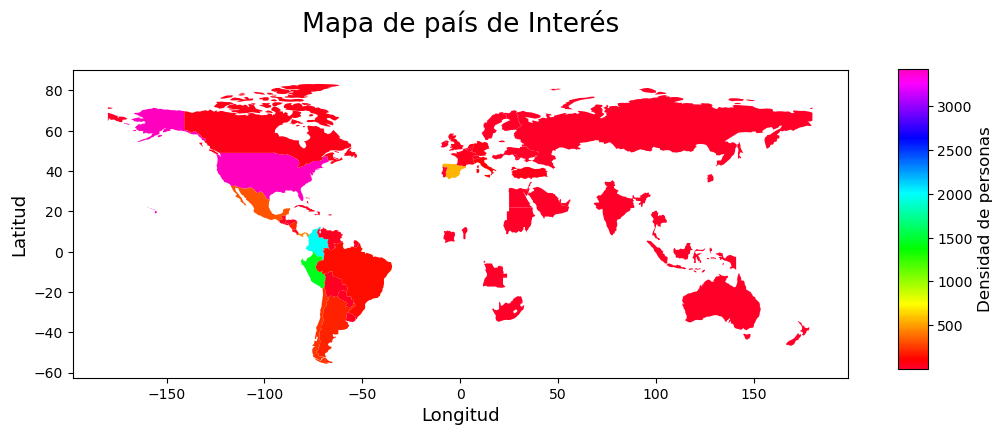

In [31]:
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)

title = 'Mapa de país de Interés'

plt.title(title + '\n', fontsize=19)

gdf.plot(column='repeticiones', cmap = 'gist_rainbow', ax = ax)
ax.set_xlabel('Longitud', fontsize = 13) 
ax.set_ylabel('Latitud', fontsize = 13)

#Definición de los valores mínimo y máximo como límites de la barra #a utilizar
min_p = min(gdf['repeticiones'])
max_p = max(gdf['repeticiones'])
#Definición de la barra gráfica
bar = plt.cm.ScalarMappable(cmap='gist_rainbow',norm=plt.Normalize(vmin=min_p, vmax=max_p)) 
#Se declara una lista donde se guardarán los valores de la barra
bar._A = [] 
#Declaración de la ubicación y el tamaño de la barra. 
cax = plt.axes([0.95, 0.35, 0.03, 0.3]) #[xcoord, ycoord, ancho, largo]
# Impresión de la barra con las variables superiores (bar y cax)
cbar = fig.colorbar(bar, cax=cax)
#Título de la barra
cbar.set_label('Densidad de personas', fontsize = 12)